<a href="https://colab.research.google.com/github/zz231008/-deeplearning/blob/main/Chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#ニューラルネットワーク
#3.1.3 activation function:活性化函数是决定入力信号的和如何转化为出力信号的函数。
#感觉激活函数类似前面的计算完权重和和偏置后的判断条件，
#而前面简单的网络结构的条件输出只有0和1，而神经网络往往是由函数作为条件的输出值是连续的。
#3.2.2 step function（大于0输出1，反之0）
def step_fuction(x):
  if x > 0:
    return 1
  else:
    return 0

In [ ]:
#上面的方式x只能是数值，如何使用数组呢，将数组的值变成布尔值，然后将布尔值转化为整型↓
import numpy as np
def step_function(x):
  y = x > 0
  return y.astype(np.int32)#书中使用astpye整型转换直接使用的int，但是错误提示似乎现在需要指定具体是16，32多少进制的

In [ ]:
x = np.array([-1.0, 1.0, 2.0])
print(x)
y = x > 0
print(y)
y.dtype

[-1.  1.  2.]
[False  True  True]


dtype('bool')

In [ ]:
y = y.astype(np.int32)
y

array([0, 1, 1], dtype=int32)

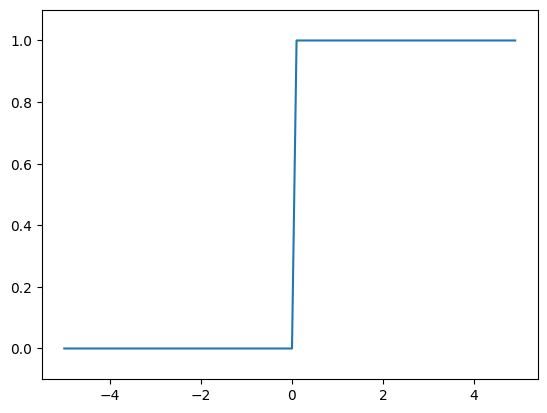

In [ ]:
#3.2.3 graph of step
import matplotlib.pylab as plt
def step_function(x):
  return np.array(x > 0, dtype=np.int32)
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [ ]:
#3.2.4sigmoid
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [ ]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [ ]:
t = np.array([1.0, 2.0, 3.0])
1.0 + t

array([2., 3., 4.])

In [ ]:
1.0 / t

array([1.        , 0.5       , 0.33333333])

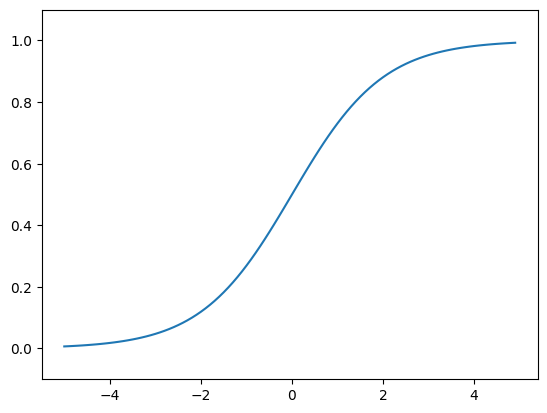

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

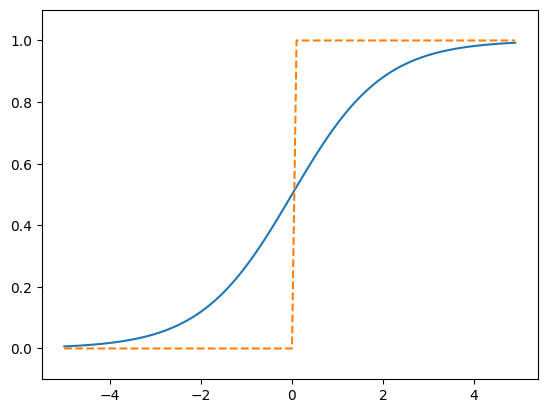

In [ ]:
#3.2.5
y2 = step_function(x)
plt.plot(x, y)
plt.plot(x, y2, linestyle='dashed')
plt.ylim(-0.1, 1.1)
plt.show()

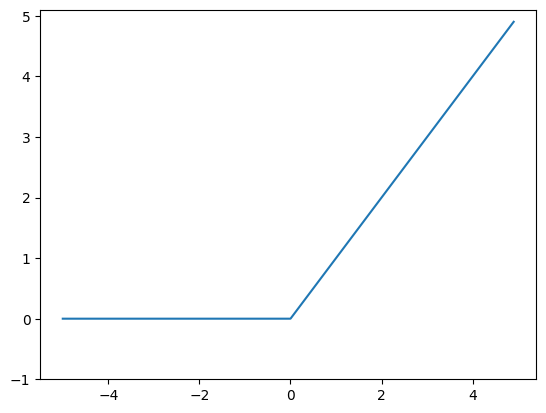

In [ ]:
#3.2.7 relu(rectified linear unit)
def relu(x):
  return np.maximum(0, x)
y3 = relu(x)
plt.plot(x, y3)
plt.ylim(-1.0, 5.1)
plt.show()

In [ ]:
#3.3 多次元配列の計算
A = np.array([1, 2, 3, 4])
print(A)
np.ndim(A)

[1 2 3 4]


1

In [ ]:
A.shape

(4,)

In [ ]:
A.shape[0]

4

In [ ]:
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)
np.ndim(B)

[[1 2]
 [3 4]
 [5 6]]


2

In [ ]:
B.shape

(3, 2)

In [ ]:
B.shape[1]

2

In [ ]:
#3.3.2 dot
A = np.array([[1, 2], [3, 4]])
A.shape

(2, 2)

In [ ]:
B = np.array([[5, 6], [7, 8]])
B.shape

(2, 2)

In [ ]:
np.dot(A, B)

array([[19, 22],
       [43, 50]])

In [ ]:
A = np.array([[1, 2, 3], [4, 5, 6]])
A.shape

(2, 3)

In [ ]:
B = np.array([[1, 2], [3, 4], [5, 6]])
B.shape

(3, 2)

In [ ]:
np.dot(A, B)

array([[22, 28],
       [49, 64]])

In [ ]:
C = np.array([[1, 2], [3, 4]])
C.shape

(2, 2)

In [ ]:
np.dot(A, C)#A(2, 3) C(2, 2)

ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

In [ ]:
np.dot(C, A)#C(2, 2) A(2, 3)

array([[ 9, 12, 15],
       [19, 26, 33]])

In [ ]:
# 3.3.3 ニューラルネットワークの行列の積
# X dot W = Y
X = np.array([1, 2])
X.shape

(2,)

In [ ]:
W = np.array([[1, 3, 5], [2, 4, 6]])
print(W)
W.shape

[[1 3 5]
 [2 4 6]]


(2, 3)

In [ ]:
Y = np.dot(X, W)
print(Y)
Y.shape

[ 5 11 17]


(3,)

In [ ]:
#3.4 3層ニューラルネットワークの実装
X = np.array([1.0, 1.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])
print("X", X.shape)
print("W1", W1.shape)
print("B1", B1.shape)
A1 = np.dot(X, W1) + B1 #计算的入力层的信号权重和偏置的总和传入第一层的第一个神经元
Z1 = sigmoid(A1) #再通过激活函数进行转换为第一层的信号
print(A1)
print(Z1)

X (2,)
W1 (2, 3)
B1 (3,)
[0.5 1.1 1.7]
[0.62245933 0.75026011 0.84553473]


In [ ]:
W2 =np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])
print("Z1", Z1.shape)
print("W2", W2.shape)
print("B2", B2.shape)
A2 = np.dot(Z1, W2) + B2# 第一层传的信号同样经过上述方式传如到第二层
Z2 = sigmoid(A2)
print(A2)
print(Z2)

Z1 (3,)
W2 (3, 2)
B2 (2,)
[0.56595837 1.33143463]
[0.63783007 0.79107784]


In [ ]:
#从第二层往出力层传信号,only use activation function identity_function in the output layer
def identity_function(x):
  return x
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])
print("Z2", Z2.shape)
print("W3", W3.shape)
print("B3", B3.shape)
A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)
print(A3)
print(Y)

Z2 (2,)
W3 (2, 2)
B3 (2,)
[0.32199857 0.70778016]
[0.32199857 0.70778016]


In [ ]:
#3.4.3 matome
def init_network():
  network = {}
  network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
  network['b1'] = np.array([0.1, 0.2, 0.3])
  network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
  network['b2'] = np.array([0.1, 0.2])
  network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
  network['b3'] = np.array([0.1, 0.2])
  return network
def forward(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']
  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = identity_function(a3)
  return y
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


In [1]:
#3.5 the design of output layer in P66 of book
#一般来说回归问题用恒等函数，分类问题用softmax（）
import numpy as np
import matplotlib.pyplot as plt
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print(exp_a)
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)
y = exp_a / sum_exp_a
print(y)


[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [3]:
def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a
  return y
softmax(a)

array([0.01821127, 0.24519181, 0.73659691])

In [5]:
#指数函数有值很容易就很大，电脑计算的时候会有显示不了的问题overflow
b = np.array([1010, 1000, 990])
np.exp(b) / np.sum(np.exp(b))

<ipython-input-5-e94e40c26a9e>:3: RuntimeWarning: overflow encountered in exp
  np.exp(b) / np.sum(np.exp(b))
<ipython-input-5-e94e40c26a9e>:3: RuntimeWarning: invalid value encountered in divide
  np.exp(b) / np.sum(np.exp(b))


array([nan, nan, nan])

In [6]:
c = np.max(b)
b - c

array([  0, -10, -20])

In [7]:
np.exp(b -c) / np.sum(np.exp(b - c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [8]:
def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a - c)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a
  return y

In [10]:
#y的大小关系和最后层的a一样，所以出力层的softmax也经常会省略掉
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
np.sum(y)

[0.01821127 0.24519181 0.73659691]


1.0

In [20]:
#3.6 mnist,colab有提供mnist的数据，就直接用咯
import pandas as pd
mnist_test = pd.read_csv('/content/sample_data/mnist_test.csv', header = None)
mnist_train_small = pd.read_csv('/content/sample_data/mnist_train_small.csv', header = None)
mnist_test.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
x_train, t_train = mnist_train_small.iloc[:, 1:].values, mnist_train_small.iloc[:, 0].values
x_test, t_test = mnist_test.iloc[:, 1:].values, mnist_test.iloc[:, 0].values
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(20000, 784)
(20000,)
(10000, 784)
(10000,)


6
(784,)
(28, 28)


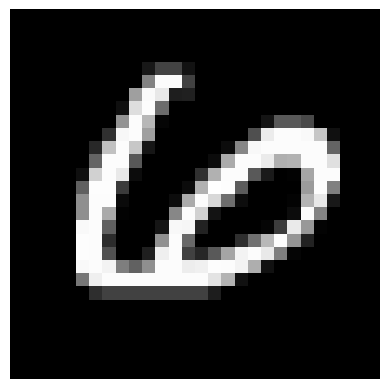

In [48]:
#原书代码使用PIL打印图像，但是colab无法使用，这里用了matplotlib.imshow()
def img_show(img):
  plt.imshow(img, cmap="gray")
  plt.axis("off")  # 关闭坐标轴
  plt.show()

img = x_train[0]
label = t_train[0]
print(label)#6

print(img.shape)#(784,)
img = img.reshape(28, 28)#变形成原图的size
print(img.shape)#(28, 28)

img_show(img)

In [41]:
#sample_weight.pkl文件下载https://github.com/oreilly-japan/deep-learning-from-scratch/blob/master/ch03/sample_weight.pkl
import pickle
def init_network():
  with open('/content/sample_weight.pkl', 'rb') as f:
    network = pickle.load(f)
    return network

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def predict(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']
  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = softmax(a3)
  return y

x, t = x_test, t_test
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
  y = predict(network,x[i])
  p = np.argmax(y)#取最大值的索引，即概率最高的值的索引对应的也是预测的label
  if p == t[i]:
    accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

<ipython-input-41-d60af043f037>:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Accuracy:0.9207


In [ ]:
#3.6.3 batch_size
